**TUTORIAL: Reconocimiento de dígitos manuscritos MNIST**

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
import numpy as np
import matplotlib.pyplot as plt

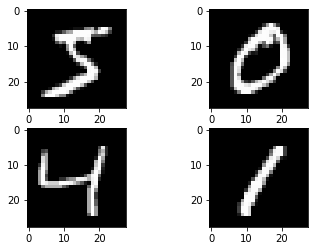

In [4]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
# arreglar semilla aleatoria para la reproducibilidad
seed = 0
np.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# aplanar 28 * 28 imágenes a un vector 784 para cada imagen
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
model = baseline_model()
# Fit the model
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2786 - accuracy: 0.9211 - val_loss: 0.1412 - val_accuracy: 0.9579
Epoch 2/10
 - 4s - loss: 0.1111 - accuracy: 0.9680 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 3/10
 - 4s - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.0746 - val_accuracy: 0.9777
Epoch 4/10
 - 5s - loss: 0.0503 - accuracy: 0.9852 - val_loss: 0.0724 - val_accuracy: 0.9773
Epoch 5/10
 - 4s - loss: 0.0364 - accuracy: 0.9897 - val_loss: 0.0618 - val_accuracy: 0.9815
Epoch 6/10
 - 5s - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0578 - val_accuracy: 0.9823
Epoch 7/10
 - 4s - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.0663 - val_accuracy: 0.9782
Epoch 8/10
 - 4s - loss: 0.0153 - accuracy: 0.9963 - val_loss: 0.0565 - val_accuracy: 0.9823
Epoch 9/10
 - 4s - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 10/10
 - 5s - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.0621 - val_accuracy: 0.9819
Baseline Error: 1.8

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


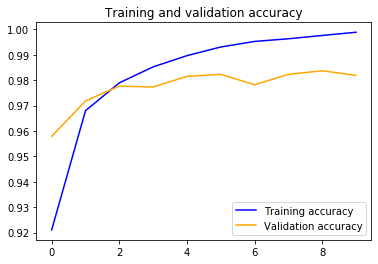

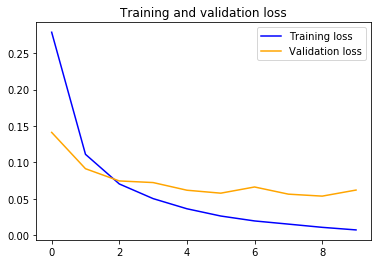

In [14]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()